In [1]:
# import packages
import xarray as xr # package for handling netCDF files
import numpy as np # package for numerical operations
import glob # package for file path operations

# Getting Started with Juypter Notebooks on Gadi

To start with Juypter notebooks on gadi you'll need to either set a conda path in your home (?) folder and use conda to download neccessary packages, or use a preset module in hh5 project. 

Login in to NCI and add project hh5, shouldn't be too long till you get approved. 
https://my.nci.org.au/mancini/login

When you're approved you'll be able to start a session using this module. 

When you're starting the session you'll need to add +gdata/hh5 to the storage paths. 

Next, you need to change some of the advanced settings, this is a tick box and stuff drops down when you click on it. 

Under 'Module directories', add '/g/data/hh5/public/modules'. Under 'Modules' add 'conda/analysis3'.

For 26 years of data start a large session


In [ ]:
# loading data using glob
# if you have a file with just all .nc files you can search in that directory for anything ending with .nc 
# using this search pattern glob will return all the file paths which you can then open with xarray

import glob
file_paths = glob.glob('/add_file_path/*.nc')
dataset = xr.open_mfdataset(file_paths, combine='by_coords')

In [7]:
# for showing some functions I'll open a sst dataset.

sst = xr.open_dataarray('/Users/isabelaconde/Desktop/data/obs_sst/NOAA_OISST_sst_mon_mean.nc')
sst

<xarray.DataArray 'sst' (time: 516, lat: 720, lon: 1440)> Size: 2GB
[534988800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2024-08-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:      Monthly Mean of Sea Surface Temperature
    units:          degC
    valid_range:    [-3. 45.]
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Individual Observations
    actual_range:   [-1.8  32.14]
    standard_name:  sea_surface_temperature

In [9]:
# now I only want a certain subset say two years from 2020 and 2021

sst_subset = sst.sel(time=slice('2020', '2021')) # will be from jan 2020 to dec 2021

# if you just wanted a couple of months you could 

sst_months =   sst.sel(time=slice('2020-01', '2020-03')) # will be from jan 2020 to march 2020 
sst_months

<xarray.DataArray 'sst' (time: 3, lat: 720, lon: 1440)> Size: 12MB
[3110400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 24B 2020-01-01 2020-02-01 2020-03-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:      Monthly Mean of Sea Surface Temperature
    units:          degC
    valid_range:    [-3. 45.]
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Individual Observations
    actual_range:   [-1.8  32.14]
    standard_name:  sea_surface_temperature

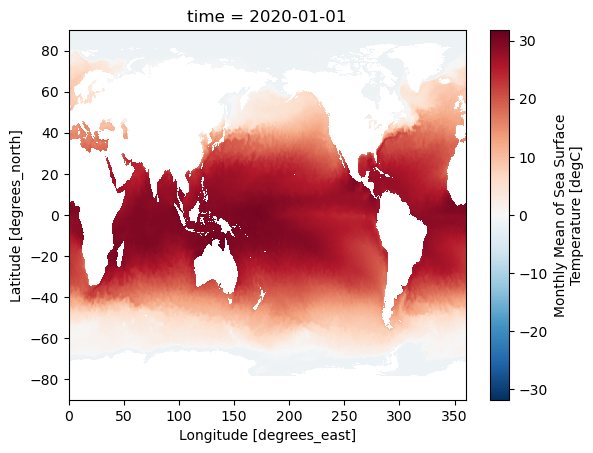

In [11]:
# sel lets you call on the actual time values in the dataset, so you can use it to select any time range you want.
# whereas you can do similar operations with .isel which lets you select by index,
# so if I wanted to just plot the first month of sst's in sst_subset

sst_subset.isel(time =0).plot()

# if you go .plot() xarray will try to autmatically plot the data for you

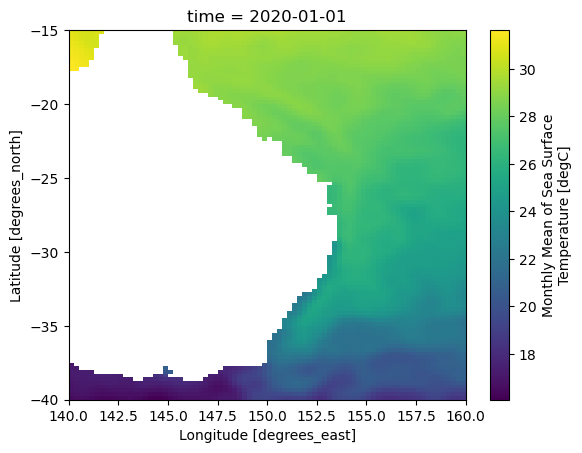

In [19]:
# just get east aus coast 

sst_east_aus = sst_subset.sel(lat=slice(-40, -15), lon=slice(140, 160))
sst_east_aus.isel(time = 0).plot()
# here i have to go .isel(time=0) before i plot otherwise it will plot all the time values and just create a weird histogram

In [23]:
# okay, so this is monthly data, so i can create a monthly climatology by grouping the data by month

sst_clim = sst_east_aus.groupby('time.month').mean(dim='time')
# xarray can do groupby for many different time frames, i.e season, day, year

# if i wanted to create a time series of anomalies i could go 

sst_anom = sst_east_aus.groupby('time.month') - sst_clim


Text(0, 0.5, 'Latitude')

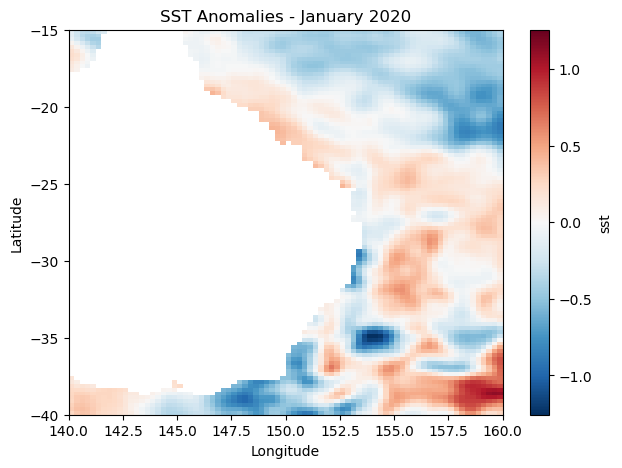

In [29]:
# create a nice figure for the anomalies in jan 2020

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

sst_anom.isel(time=0).plot()

plt.title('SST Anomalies - January 2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
